## FMST - Concrete Strength Prediction 

### Exploratory Data Analysis report

#### 1. Univariate Analysis

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Model specific libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing Dataset

conc = pd.read_csv("concrete.csv")

In [3]:
# First look at Dataset

conc.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
conc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
conc.shape

(1030, 9)

In [6]:
conc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


##### Insights:
1. Dataset has 1030 rows across 9 features.
2. All features are quantitative. The dependent variable is continuous. 
3. 'ash' feature seems to have a large skew with almost 50% of data at 0
4. There are '0' values present for slag, ash, superplastic. These seem to be relevant since concrete mixture may have varying levels of components in it. So for now, we don't seem to have to impute them.

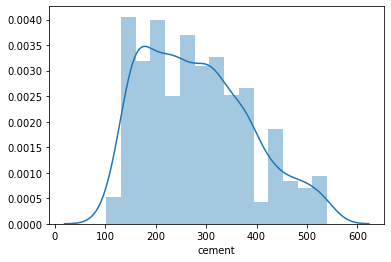

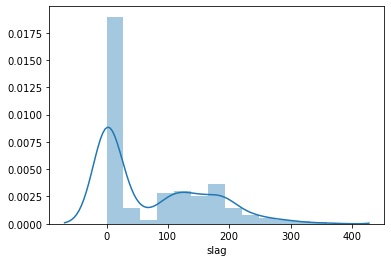

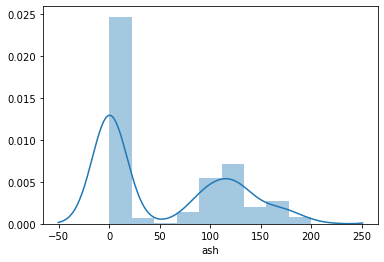

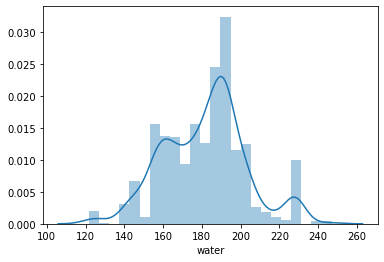

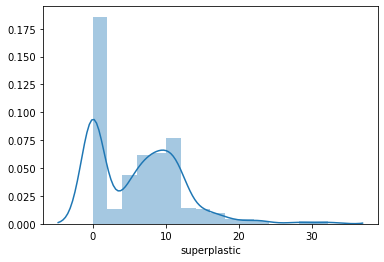

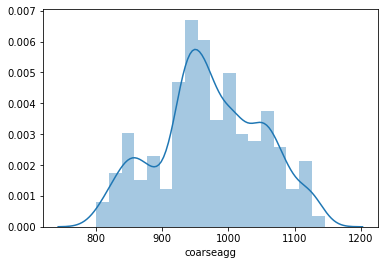

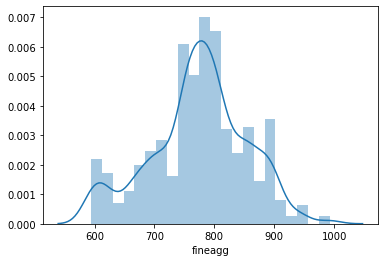

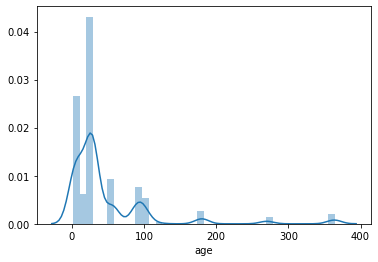

In [7]:
# Distplot for all independent variables

for i in ["cement","slag","ash","water","superplastic","coarseagg","fineagg","age"]:
    sns.distplot(conc[i])
    plt.show()

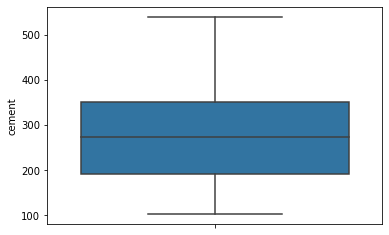

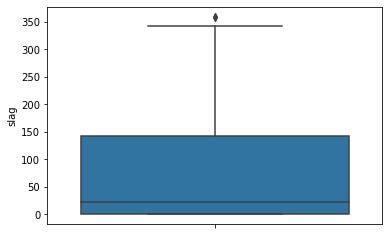

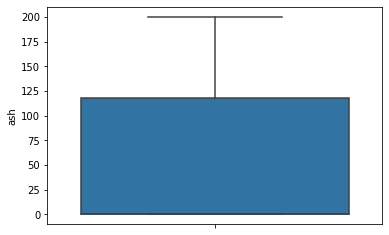

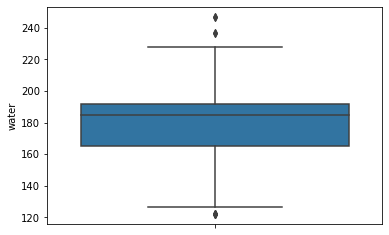

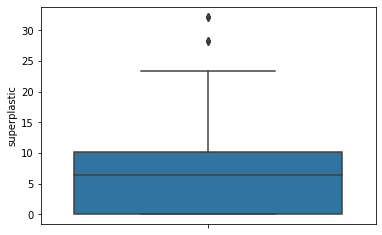

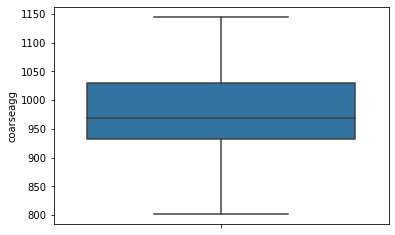

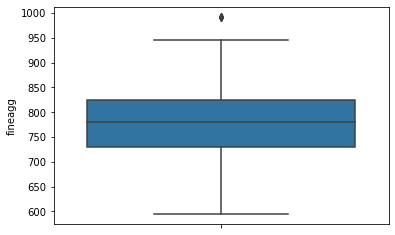

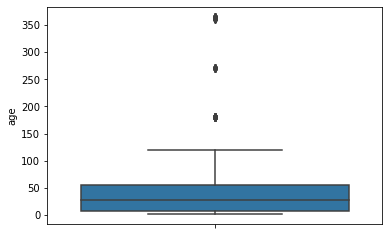

In [8]:
# Boxplot for all independent features

for i in ["cement","slag","ash","water","superplastic","coarseagg","fineagg","age"]:
    sns.boxplot(conc[i],orient='v')
    plt.show()


In [9]:
# Skew of independent features

conc.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

##### Insights:
1. Cement is the only variable with relatively normal distribution
2. All other features are heavily skewed and has more outliers which would have to be treated
3. Age appears to be the most multi-modal distribution

In [10]:
# Checking for duplicates

conc[conc.duplicated()]
# len(conc[conc.duplicated()])

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [11]:
# Dropping duplicates

conc.drop_duplicates(inplace = True)
conc.shape

(1005, 9)

In [12]:
# Checking for outliers using IQR and treating them
conc1 = conc.copy()
Q1 = conc.quantile(0.25)
Q3 = conc.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement          158.30
slag            142.50
ash             118.30
water            26.30
superplastic     10.00
coarseagg        99.00
fineagg          97.90
age              49.00
strength         21.35
dtype: float64


In [13]:
np.where((conc < (Q1 - 1.5 * IQR)) | (conc > (Q3 + 1.5 * IQR)))

(array([  33,   44,   51,   64,   66,   93,   99,  103,  129,  129,  133,
         144,  149,  152,  156,  157,  159,  190,  192,  198,  199,  207,
         232,  245,  256,  257,  262,  263,  270,  291,  296,  300,  310,
         311,  321,  357,  359,  368,  391,  428,  443,  443,  444,  458,
         460,  477,  496,  496,  498,  527,  528,  559,  568,  571,  571,
         574,  581,  588,  606,  608,  609,  618,  628,  682,  699,  706,
         707,  718,  724,  728,  738,  739,  759,  772,  799,  809,  820,
         832,  839,  839,  843,  860,  879,  880,  893,  897,  898,  927,
         928,  932,  934,  947,  961,  966,  970,  978,  992, 1001, 1003],
       dtype=int64),
 array([3, 4, 7, 7, 3, 7, 7, 7, 3, 6, 7, 7, 7, 7, 4, 7, 7, 8, 8, 7, 7, 7,
        4, 8, 7, 8, 7, 3, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 6, 7, 3,
        7, 7, 3, 6, 8, 4, 7, 7, 7, 3, 6, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 8, 3, 4, 7, 7, 7, 3, 4, 3, 4, 7, 3, 6, 7, 7, 7, 7, 3, 1, 7, 8,
        7, 4, 7,

In [14]:
# Treating outliers by replacing lower side with lower whisker and upper side with upper whisker

for i,j in zip(np.where(conc < Q1 - 1.5 * IQR)[0],np.where(conc < Q1 - 1.5 * IQR)[1]): 
    whisker = Q1 - 1.5 * IQR
    conc.iloc[i,j] = whisker[j]
                        
for i,j in zip(np.where(conc > Q3 + 1.5 * IQR)[0],np.where(conc > Q3 + 1.5 * IQR)[1]): 
    whisker = Q3 + 1.5 * IQR
    conc.iloc[i,j] = whisker[j]
           
np.where((conc < (Q1 - 1.5 * IQR)) | (conc > (Q3 + 1.5 * IQR)))

(array([], dtype=int64), array([], dtype=int64))

##### Insights:
1. 25 duplicate rows have been cleared
2. There are totally 99 data points which are outliers with the maximum number of outliers in Age(7th column)
3. Outliers have been corrected using IQR and whisker limits rather than mean or z-score imputation to avoid introducing high variability to data.

#### 2. Bi-variate Analysis

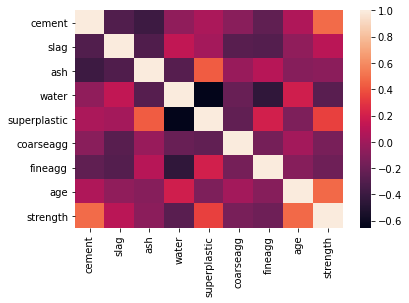

In [15]:
# Correlation between all variables

conc.corr()
sns.heatmap(conc.corr())

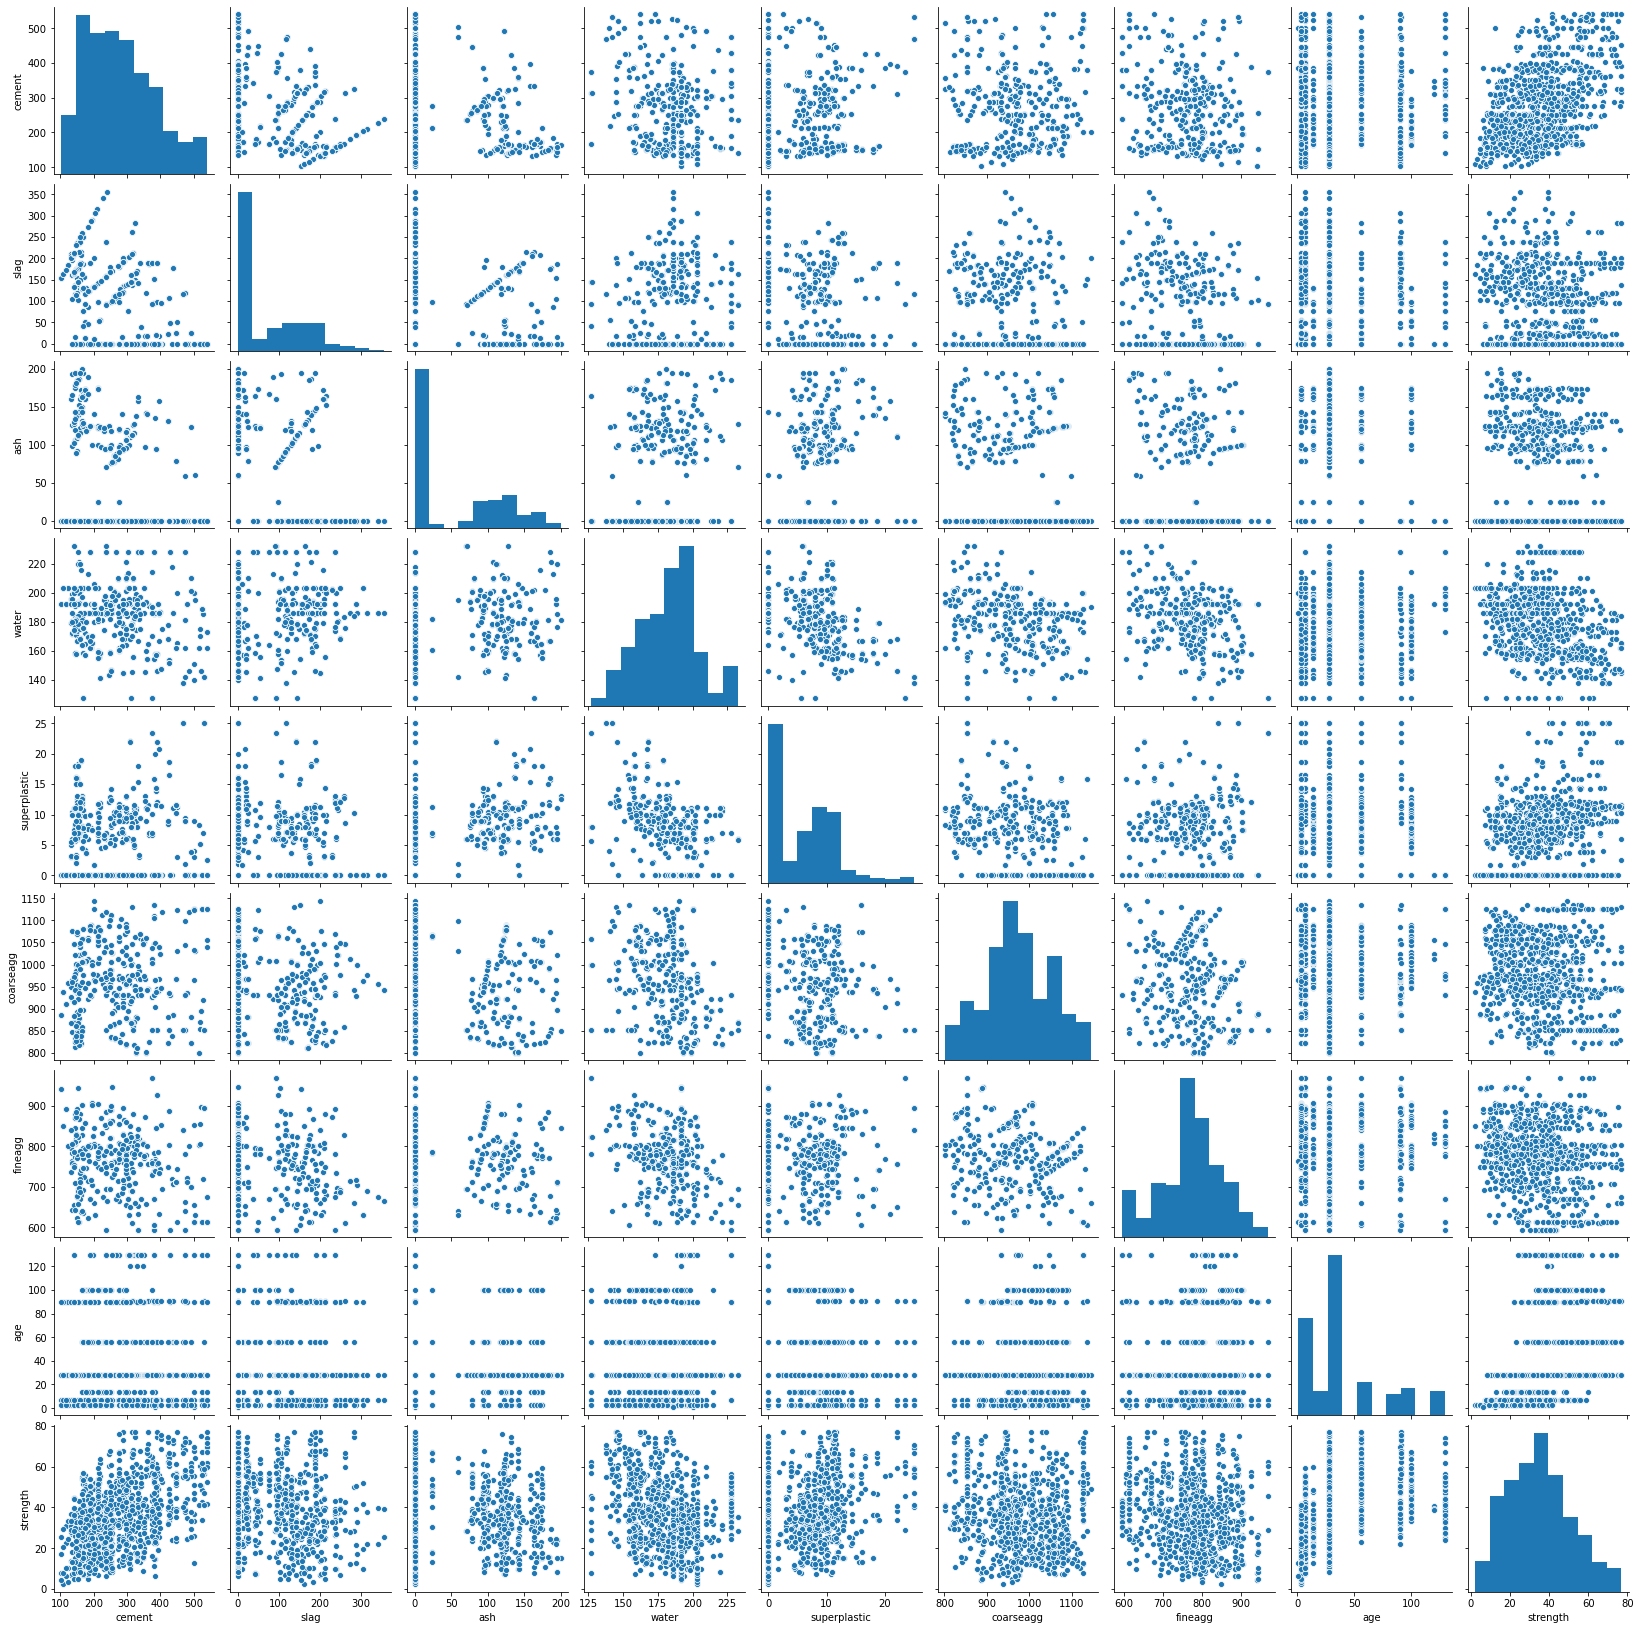

In [16]:
# Pairplot between all variables

sns.pairplot(conc)
plt.show()

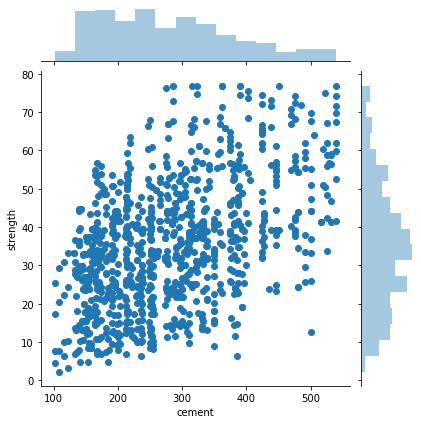

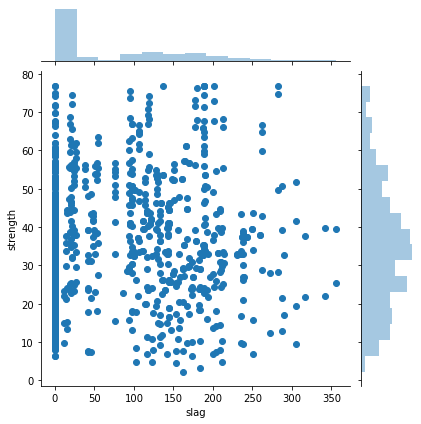

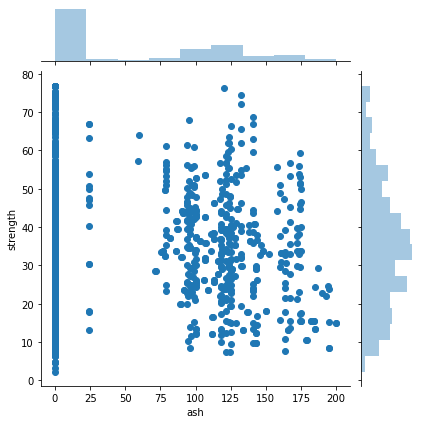

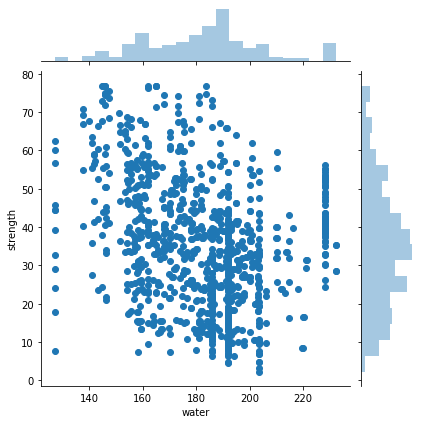

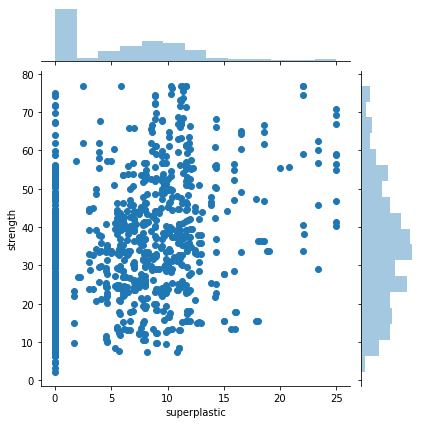

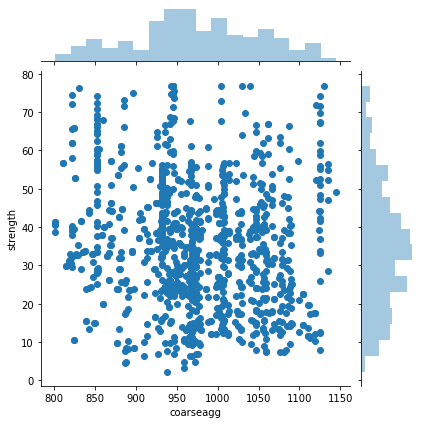

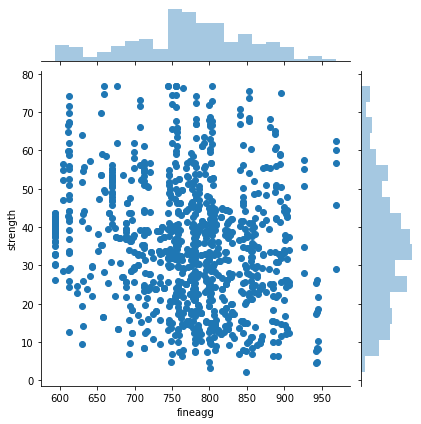

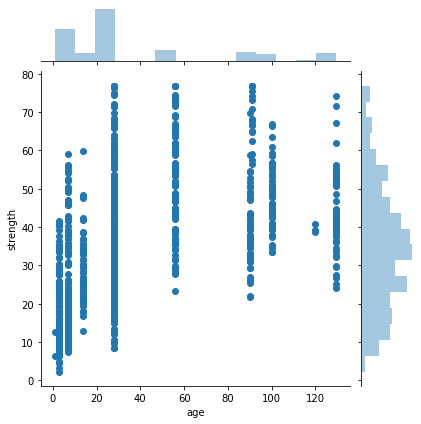

In [17]:
# Additional Plots between dependent variable(strength) and other features to look at the correlation more closely

for j in ["cement","slag","ash","water","superplastic","coarseagg","fineagg","age"]:
    sns.jointplot(conc[j],conc["strength"])
    plt.show()
              

##### Insights:

1. Based on pair plot and detailed scatter plot above, it can be seen that cement content and strength has high correlation.
2. Of the remaining features, we can see a slight negative correlation between water content and strength with strength decreasing overall as water level increases.
3. Due to lack of additional details/subject matter expertise on concrete features, no columns are being dropped in this model building.

#### 3. Feature Engineering

In [18]:
# Split dependent and independent features
X= conc.drop('strength',axis=1)
Y= conc['strength']


In [19]:
# Scale the data on X

# Using Standard scaler. Although most of the features have the same unit,the spread in values is
# large and also scaling to normalize the units for age with the rest.

cols_to_scale=X.columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.316792,1.625450,-0.865375,1.013480,-1.045420,-0.033232,-0.300903,-0.281105
1,-1.052152,-0.346513,1.071486,-1.123827,0.842159,1.372475,0.295376,-0.671679
2,-0.274530,-0.836600,0.625836,0.252182,-0.084153,-0.225388,1.107915,-0.281105
3,-0.121115,0.487332,-0.865375,2.171975,-1.045420,-0.546508,-1.282201,-0.281105
4,-1.187348,1.293305,-0.865375,0.531167,0.545040,0.941736,-0.948435,-0.281105


In [20]:
# Split the data into test and train


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

##### Models to consider:

1. Starting with simple Linear Regression
2. Random Forest Regressor 
3. Bagging
4. Gradient Boosting

   

### Creating the model and tuning it

#### 1. Building model and K-Fold cross validation

In [45]:
# Preparing for dataframe to display results of all algorithms and techniques

algo = []
trnscore = []
tstscore = []
mse = []
rmse = []
score = []
stddev = []
cvscore = []

from sklearn.metrics import mean_squared_error

In [46]:
# Linear Regression
concLR = LinearRegression()
concLR.fit(X_train,y_train)
y_pred = concLR.predict(X_test)
trngscore = concLR.score(X_train,y_train)
testscore = concLR.score(X_test,y_test)
print("Training score for Linear Regression:", trngscore)
print("Test score for Linear Regression:", testscore)
algo.append('Linear Regression')
trnscore.append(concLR.score(X_train,y_train))
tstscore.append(concLR.score(X_test,y_test))
mse.append((mean_squared_error(y_pred,y_test)))
rmse.append((np.sqrt(mean_squared_error(y_test,y_pred))))
score.append('N/A')
stddev.append('N/A')
cvscore.append('N/A')

Training score for Linear Regression: 0.7144108190266845
Test score for Linear Regression: 0.7338357282024661


In [47]:
# Random Forest Regressor 
concRF = RandomForestRegressor(random_state = 7)
concRF.fit(X_train,y_train)
y_predRF = concRF.predict(X_test)
trngscore = concRF.score(X_train,y_train)
testscore = concRF.score(X_test,y_test)
print("Training score for Random Forest:", trngscore)
print("Test score for Random Forest:", testscore)
algo.append('Random Forest Regression')
trnscore.append(concRF.score(X_train,y_train))
tstscore.append(concRF.score(X_test,y_test))
mse.append((mean_squared_error(y_predRF,y_test)))
rmse.append((np.sqrt(mean_squared_error(y_test,y_predRF))))
score.append('N/A')
stddev.append('N/A')
cvscore.append('N/A')

Training score for Random Forest: 0.9827567139689612
Test score for Random Forest: 0.8942409936769005


In [48]:
# Bagging
from sklearn.ensemble import BaggingRegressor
concBR = BaggingRegressor()
concBR.fit(X_train,y_train)
y_predBR = concBR.predict(X_test)
trngscore = concBR.score(X_train,y_train)
testscore = concBR.score(X_test,y_test)
print("Training score for Bagging Regression:", trngscore)
print("Test score for Bagging Regression:", testscore)
algo.append('Bagging Regression')
trnscore.append(concBR.score(X_train,y_train))
tstscore.append(concBR.score(X_test,y_test))
mse.append((mean_squared_error(y_predBR,y_test)))
rmse.append((np.sqrt(mean_squared_error(y_test,y_predBR))))
score.append('N/A')
stddev.append('N/A')
cvscore.append('N/A')

Training score for Bagging Regression: 0.9770316906162771
Test score for Bagging Regression: 0.9054950504879657


In [49]:
# Boosting 
from sklearn.ensemble import GradientBoostingRegressor
concGB = GradientBoostingRegressor()
concGB.fit(X_train,y_train)
y_predGB = concGB.predict(X_test)
trngscore = concGB.score(X_train,y_train)
testscore = concGB.score(X_test,y_test)
print("Training score for Gradient Boosting:", trngscore)
print("Test score for Gradient Boosting:", testscore)
algo.append('Gradient Boosting')
trnscore.append(concGB.score(X_train,y_train))
tstscore.append(concGB.score(X_test,y_test))
mse.append((mean_squared_error(y_predGB,y_test)))
rmse.append((np.sqrt(mean_squared_error(y_test,y_predGB))))
score.append('N/A')
stddev.append('N/A')
cvscore.append('N/A')

Training score for Gradient Boosting: 0.9482989354548262
Test score for Gradient Boosting: 0.8986516705387857


In [50]:
# Print dataframe with metrics
summary = pd.DataFrame()
summary['Model'] = algo
summary['Training Score'] = trnscore
summary['Testing Score'] = tstscore
summary['MSE'] = mse
summary['RMSE'] = rmse
summary = summary.set_index('Model')
summary

,Training Score,Testing Score,MSE,RMSE
Model,,,,
Linear Regression,0.714411,0.733836,69.042588,8.309187
Random Forest Regression,0.982757,0.894241,27.433718,5.237721
Bagging Regression,0.977032,0.905495,24.514433,4.951205
Gradient Boosting,0.948299,0.898652,26.289595,5.127338


In [51]:
# K-fold cross validation prep
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

K = 10
rand_state = 77

kfold = KFold(n_splits = K, random_state=rand_state)


In [52]:
# K-Fold cross validation on Linear Regression
#kfoldLR = cross_val_score(concLR,X_train, y_train, cv=kfold)
kfoldLR2 = cross_val_score(concLR,X,Y,cv=kfold)
#print("K-Fold Training score on Linear Regression:", np.mean(abs(kfoldLR)))
#print("K-Fold Training std deviation on Linear Regression:", kfoldLR.std())
print("K-Fold score on Linear Regression :",np.mean(abs(kfoldLR2)))
print("K-Fold std deviation on Linear Regression:", kfoldLR2.std())
algo.append('Linear Regression with K-Fold')
trnscore.append('N/A')
tstscore.append('N/A')
mse.append('N/A')
rmse.append('N/A')
score.append(np.mean(abs(kfoldLR2)))
stddev.append(kfoldLR2.std())
cvscore.append('N/A')


K-Fold score on Linear Regression : 0.7033172409861539
K-Fold std deviation on Linear Regression: 0.060692934121468305


In [53]:
# K-Fold cross validation on Random Forest
#kfoldRF = cross_val_score(concRF,X_train, y_train, cv=kfold)
kfoldRF2 = cross_val_score(concRF,X,Y,cv=kfold)
#print("K-Fold Training score on Random Forest:", np.mean(abs(kfoldRF)))
#print("K-Fold Training std deviation on Random Forest:", kfoldRF.std())
print("K-Fold score on Random Forest:",np.mean(abs(kfoldRF2)))
print("K-Fold std deviation on Linear Regression:", kfoldRF2.std())
algo.append('Random Forest with K-Fold')
trnscore.append('N/A')
tstscore.append('N/A')
mse.append('N/A')
rmse.append('N/A')
score.append(np.mean(abs(kfoldRF2)))
stddev.append(kfoldRF2.std())
cvscore.append('N/A')


K-Fold score on Random Forest: 0.910244091578922
K-Fold std deviation on Linear Regression: 0.0315096775205882


In [54]:
# K-Fold cross validation on Bagging Regressor
#kfoldBR = cross_val_score(concBR,X_train, y_train, cv=kfold)
kfoldBR2 = cross_val_score(concBR,X,Y,cv=kfold)
#print("K-Fold Training score on Bagging Regression:", np.mean(abs(kfoldBR)))
#print("K-Fold Training std deviation on Bagging Regression:", kfoldBR.std())
print("K-Fold score on Bagging Regression:",np.mean(abs(kfoldBR2)))
print("K-Fold std deviation on Bagging Regression:", kfoldBR2.std())
algo.append('Bagging with K-Fold')
trnscore.append('N/A')
tstscore.append('N/A')
mse.append('N/A')
rmse.append('N/A')
score.append(np.mean(abs(kfoldBR2)))
stddev.append(kfoldBR2.std())
cvscore.append('N/A')

K-Fold score on Bagging Regression: 0.8979341383863846
K-Fold std deviation on Bagging Regression: 0.027594929428126136


In [55]:
# K-Fold cross validation on Gradient Boosting
#kfoldGB = cross_val_score(concGB,X_train, y_train, cv=kfold)
kfoldGB2 = cross_val_score(concGB,X,Y,cv=kfold)
#print("K-Fold Training score on Gradient Boosting:", np.mean(abs(kfoldGB)))
#print("K-Fold Training std deviation on Gradient Boosting:", kfoldGB.std())
print("K-Fold score on Gradient Boosting:",np.mean(abs(kfoldGB2)))
print("K-Fold std deviation on Gradient Boosting:", kfoldGB2.std())
algo.append('Gradient Boosting with K-Fold')
trnscore.append('N/A')
tstscore.append('N/A')
mse.append('N/A')
rmse.append('N/A')
score.append(np.mean(abs(kfoldGB2)))
stddev.append(kfoldGB2.std())
cvscore.append('N/A')

K-Fold score on Gradient Boosting: 0.8998886227910458
K-Fold std deviation on Gradient Boosting: 0.019597520357012718


In [56]:
# DataFrame to compare results.
summary = pd.DataFrame()
summary['Model'] = algo
summary['Training Score'] = trnscore
summary['Testing Score'] = tstscore
summary['MSE'] = mse
summary['RMSE'] = rmse
summary['K-fold Score'] = score
summary['K-fold std deviation'] = stddev
summary = summary.set_index('Model')
summary


,Training Score,Testing Score,MSE,RMSE,K-fold Score,K-fold std deviation
Model,,,,,,
Linear Regression,0.714411,0.733836,69.0426,8.30919,N/A,N/A
Random Forest Regression,0.982757,0.894241,27.4337,5.23772,N/A,N/A
Bagging Regression,0.977032,0.905495,24.5144,4.95121,N/A,N/A
Gradient Boosting,0.948299,0.898652,26.2896,5.12734,N/A,N/A
Linear Regression with K-Fold,N/A,N/A,N/A,N/A,0.703317,0.0606929
Random Forest with K-Fold,N/A,N/A,N/A,N/A,0.910244,0.0315097
Bagging with K-Fold,N/A,N/A,N/A,N/A,0.897934,0.0275949
Gradient Boosting with K-Fold,N/A,N/A,N/A,N/A,0.899889,0.0195975


#### 2. Grid Search/Random Search

In [57]:
# GridSearchCV on Random Forest 

from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


RFGrid = GridSearchCV(RandomForestRegressor(), parameters, cv = 5, verbose = 2, n_jobs= 4)
RFGrid.fit(X, Y)

RFGrid.best_params_


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    9.8s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   23.1s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:   25.8s finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [58]:
# Random Forest score with the best parameters

rf = RandomForestRegressor(bootstrap= True,
 max_depth= 100,
 max_features= 'auto',
 min_samples_leaf= 1,
 n_estimators= 100)


scoreRF = cross_val_score(rf, X,Y, cv = 10).mean()
print("GridSearchCV on Random Forest", scoreRF)
algo.append('Random Forest with GridSearchCV')
trnscore.append('N/A')
tstscore.append('N/A')
mse.append('N/A')
rmse.append('N/A')
score.append('N/A')
stddev.append('N/A')
cvscore.append(scoreRF)



GridSearchCV on Random Forest 0.9111717262846127


In [59]:
# RandomSearchCV on Gradient Boosting
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

parameters = {'loss': ['ls','lad','quantile'],
 'max_depth': sp_randint(1,11),
 'max_features': sp_randint(2,11),
 'min_samples_leaf': sp_randint(2,11),
 'n_estimators': sp_randint(9,101)}

samples=10
GBRand = RandomizedSearchCV(GradientBoostingRegressor(), parameters, n_iter=samples)
GBRand.fit(X, Y)

GBRand.best_params_


{'loss': 'lad',
 'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 4,
 'n_estimators': 49}

In [60]:
# Gradient Boosting score with best parameters

gb = GradientBoostingRegressor(loss='lad',max_depth=10,max_features=4,
                               min_samples_leaf=4,n_estimators=49)

scoreGB = cross_val_score(gb, X,Y, cv = 5).mean()
print("RandomizedSearchCV on Gradient Boosting", scoreGB)

algo.append('Gradient Boosting with RandomizedSearchCV')
trnscore.append('N/A')
tstscore.append('N/A')
mse.append('N/A')
rmse.append('N/A')
score.append('N/A')
stddev.append('N/A')
cvscore.append(scoreGB)


RandomizedSearchCV on Gradient Boosting 0.9031024726539048


In [61]:
summary = pd.DataFrame()
summary['Model'] = algo
summary['Training Score'] = trnscore
summary['Testing Score'] = tstscore
summary['MSE'] = mse
summary['RMSE'] = rmse
summary['K-fold Score'] = score
summary['K-fold std deviation'] = stddev
summary['CV Score'] = cvscore
summary = summary.set_index('Model')
summary


,Training Score,Testing Score,MSE,RMSE,K-fold Score,K-fold std deviation,CV Score
Model,,,,,,,
Linear Regression,0.714411,0.733836,69.0426,8.30919,N/A,N/A,N/A
Random Forest Regression,0.982757,0.894241,27.4337,5.23772,N/A,N/A,N/A
Bagging Regression,0.977032,0.905495,24.5144,4.95121,N/A,N/A,N/A
Gradient Boosting,0.948299,0.898652,26.2896,5.12734,N/A,N/A,N/A
Linear Regression with K-Fold,N/A,N/A,N/A,N/A,0.703317,0.0606929,N/A
Random Forest with K-Fold,N/A,N/A,N/A,N/A,0.910244,0.0315097,N/A
Bagging with K-Fold,N/A,N/A,N/A,N/A,0.897934,0.0275949,N/A
Gradient Boosting with K-Fold,N/A,N/A,N/A,N/A,0.899889,0.0195975,N/A
Random Forest with GridSearchCV,N/A,N/A,N/A,N/A,N/A,N/A,0.911172


##### Final Observations:
1. Of all the models built, Random Forest, Bagging and Gradient Boosting had the better Testing score.
2. Both Random Forest and Bagging showed high overfitting with the variance between Training and testing score.
3. K-fold cross validation gave a better score for all the models
4. Considered Random Forest and Gradient Boosting for the SearchCV.
5. GridSearch for Random Forest and RandomizedSearch for Gradient Boosting improved the score.